In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ip=pd.read_csv('ip_mappings.csv')
fraud=pd.read_csv('ecom_txns.csv')

In [2]:
ip=pd.read_csv('ip_mappings.csv')
fraud=pd.read_csv('fraud_w_country.csv',index_col=0)

In [79]:
ip.head()

,range_start,range_end,country
0,0.0.0.0,0.255.255.255,ZZ
1,1.0.0.0,1.0.0.255,AU
2,1.0.1.0,1.0.3.255,CN
3,1.0.4.0,1.0.7.255,AU
4,1.0.8.0,1.0.15.255,CN


In [118]:
fraud.head()

,user_id,signup_datetime,datetime,amount,device_id,store,browser,sex,age,ip_address,fraud,country
0,40630765,2016-03-22 09:11:01,2016-06-01 01:58:07,12.05,41974320,toys,IE,F,27,3924506326,0,ZZ
1,90517585,2016-05-17 14:45:10,2016-06-03 13:49:55,55.68,70879186,babies,IE,F,31,2432689644,0,CN
2,63383012,2016-09-02 14:15:02,2016-12-03 13:38:24,33.45,40697637,pets,Chrome,F,49,2093944038,0,CN
3,34695055,2016-08-03 01:51:47,2016-11-11 12:49:45,40.32,29544115,toys,FireFox,M,41,77751156,0,US
4,92152176,2016-07-17 04:58:30,2016-08-24 19:12:41,49.16,80967980,babies,Chrome,Not Provided,44,1520970714,0,ES


In [5]:
len(ip['country'].unique())

249

In [6]:
ip.shape

(632596, 3)

In [7]:
fraud.shape

(150000, 11)

In [51]:
ip2int('241.0.0.133')

4043309189

In [82]:
import ipaddress
def ip2int(ip):
    return int(ipaddress.ip_address(ip))
    

In [83]:
ip['upper_bound']=ip.range_end.apply(ip2int)

In [86]:
ip.head()

,range_start,range_end,country,upper_bound,lower_bound
0,0.0.0.0,0.255.255.255,ZZ,16777215,0
1,1.0.0.0,1.0.0.255,AU,16777471,16777216
2,1.0.1.0,1.0.3.255,CN,16778239,16777472
3,1.0.4.0,1.0.7.255,AU,16779263,16778240
4,1.0.8.0,1.0.15.255,CN,16781311,16779264


In [85]:
ip['lower_bound']=ip.range_start.apply(ip2int)

In [89]:
fraud.head()

,user_id,signup_datetime,datetime,amount,device_id,store,browser,sex,age,ip_address,fraud
0,40630765,2016-03-22 09:11:01,2016-06-01 01:58:07,12.05,41974320,toys,IE,F,27,3924506326,0
1,90517585,2016-05-17 14:45:10,2016-06-03 13:49:55,55.68,70879186,babies,IE,F,31,2432689644,0
2,63383012,2016-09-02 14:15:02,2016-12-03 13:38:24,33.45,40697637,pets,Chrome,F,49,2093944038,0
3,34695055,2016-08-03 01:51:47,2016-11-11 12:49:45,40.32,29544115,toys,FireFox,M,41,77751156,0
4,92152176,2016-07-17 04:58:30,2016-08-24 19:12:41,49.16,80967980,babies,Chrome,Not Provided,44,1520970714,0


In [88]:
fraud['ip_address']=fraud.ip_address.apply(ip2int)

In [96]:


ip['upper_bound']=int(ip['upper_bound'])

TypeError: cannot convert the series to <class 'int'>

In [98]:
fraud['country'] = fraud['ip_address'].apply(lambda row: country_map(row))

In [97]:
def country_map(ip_ad):
    countries=ip.loc[(ip['upper_bound'] >= ip_ad) & (ip['lower_bound'] <= ip_ad),'country'].values
    #Account for nulls
    if len(countries)==0:
        return np.nan
    return countries[0]

In [100]:
fraud.head()

,user_id,signup_datetime,datetime,amount,device_id,store,browser,sex,age,ip_address,fraud,country
0,40630765,2016-03-22 09:11:01,2016-06-01 01:58:07,12.05,41974320,toys,IE,F,27,3924506326,0,ZZ
1,90517585,2016-05-17 14:45:10,2016-06-03 13:49:55,55.68,70879186,babies,IE,F,31,2432689644,0,CN
2,63383012,2016-09-02 14:15:02,2016-12-03 13:38:24,33.45,40697637,pets,Chrome,F,49,2093944038,0,CN
3,34695055,2016-08-03 01:51:47,2016-11-11 12:49:45,40.32,29544115,toys,FireFox,M,41,77751156,0,US
4,92152176,2016-07-17 04:58:30,2016-08-24 19:12:41,49.16,80967980,babies,Chrome,Not Provided,44,1520970714,0,ES


In [102]:
fraud_with_country = fraud.to_csv('fraud_w_country.csv')

## DATA EXPLORATION

In [89]:
fraud.columns

Index(['Unnamed: 0', 'user_id', 'signup_datetime', 'datetime', 'amount',
       'device_id', 'store', 'browser', 'sex', 'age', 'ip_address', 'fraud',
       'country'],
      dtype='object')

In [90]:
fraud.isnull().sum()

Unnamed: 0          0
user_id             0
signup_datetime     0
datetime            0
amount              0
device_id           0
store               0
browser             0
sex                 0
age                 0
ip_address          0
fraud               0
country            24
dtype: int64

In [91]:
fraud[fraud.isnull().any(axis=1)]

,Unnamed: 0,user_id,signup_datetime,datetime,amount,device_id,store,browser,sex,age,ip_address,fraud,country
1406,1406,75641889,2016-03-28 02:49:06,2016-06-14 07:21:26,55.41,89305392,pets,Chrome,F,30,1776838214,0,NaN
8686,8686,62671569,2016-02-11 20:57:25,2016-02-11 20:57:26,68.79,57616910,toys,IE,Not Provided,30,3317471393,1,NaN
16320,16320,27684724,2016-02-10 20:57:33,2016-02-10 20:57:34,68.71,57616910,toys,IE,Not Provided,30,3317471393,1,NaN
17813,17813,38136683,2016-02-12 20:57:31,2016-02-12 20:57:32,68.60,57616910,toys,IE,Not Provided,29,3317471393,1,NaN
23692,23692,67016282,2016-09-07 17:01:38,2016-12-16 02:51:00,27.50,41226289,toys,Safari,M,36,692052915,0,NaN
28152,28152,82867406,2016-03-02 00:07:14,2016-03-09 04:20:42,9.39,92844152,pets,FireFox,Not Provided,35,692054621,0,NaN
33142,33142,83435768,2016-05-23 22:19:38,2016-05-24 14:45:10,24.75,97512524,babies,IE,Not Provided,31,3320464816,0,NaN
48461,48461,4568586,2016-02-11 20:57:28,2016-02-11 20:57:29,68.80,57616910,toys,IE,M,29,3317471393,1,NaN
49661,49661,59270889,2016-08-19 09:15:15,2016-11-23 07:07:40,57.06,59208331,pets,Chrome,Not Provided,20,3317435963,0,NaN
65249,65249,33803690,2016-07-29 04:16:52,2016-08-29 11:15:26,39.12,96998548,pets,IE,Not Provided,43,702236738,0,NaN


In [92]:
len(fraud.loc[fraud['fraud']==1])

14043

In [93]:
fraud.describe()

,Unnamed: 0,user_id,amount,device_id,age,ip_address,fraud
count,150000.000000,1.500000e+05,150000.000000,1.500000e+05,150000.000000,1.500000e+05,150000.00000
mean,74999.500000,4.997374e+07,36.939101,4.998719e+07,33.646373,2.151865e+09,0.09362
std,43301.414527,2.887136e+07,18.328713,2.884795e+07,8.631547,1.248426e+09,0.29130
min,0.000000,6.290000e+02,8.500000,1.223000e+03,18.000000,5.209300e+04,0.00000
25%,37499.750000,2.503215e+07,22.430000,2.505564e+07,27.000000,1.085607e+09,0.00000
50%,74999.500000,4.986729e+07,34.570000,5.002070e+07,33.000000,2.154340e+09,0.00000
75%,112499.250000,7.490949e+07,48.740000,7.500266e+07,39.000000,3.243070e+09,0.00000
max,149999.000000,9.999964e+07,153.860000,9.999955e+07,76.000000,4.294850e+09,1.00000


In [94]:
len(fraud.index.unique())

150000

In [95]:
fraud[['device_id']]

,device_id
0,41974320
1,70879186
2,40697637
3,29544115
4,80967980
...,...
149995,21257076
149996,88664098
149997,60741655
149998,12522243


In [96]:
device_pv=pd.DataFrame(fraud[['device_id','amount']].groupby('device_id').sum().sort_values(by='amount',ascending=False))


In [97]:
device_pv.reset_index(inplace=True)

In [98]:
device_pv.head()

,device_id,amount
0,13571638,1378.17
1,17860247,1374.62
2,62170687,1368.85
3,38876376,1319.28
4,57429139,1288.14


In [99]:
device_pv.tail()

,device_id,amount
136898,24739081,8.5
136899,63767552,8.5
136900,19913392,8.5
136901,74417406,8.5
136902,83842057,8.5


<AxesSubplot:xlabel='amount'>

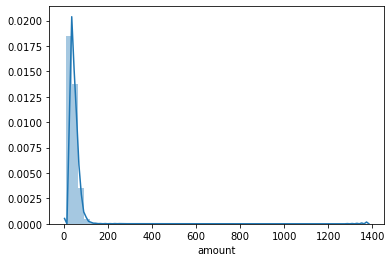

In [100]:
sns.distplot(device_pv['amount'])

<AxesSubplot:xlabel='amount'>

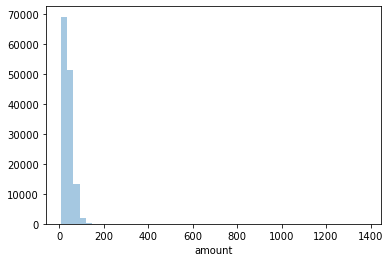

In [101]:
sns.distplot(device_pv['amount'],kde=False)

<AxesSubplot:ylabel='fraud'>

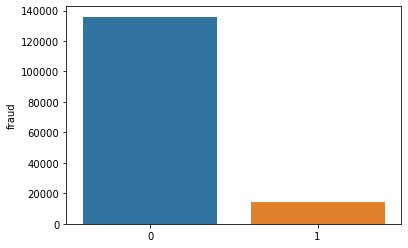

In [102]:
sns.barplot(fraud['fraud'].unique(),fraud['fraud'].value_counts())

<AxesSubplot:ylabel='store'>

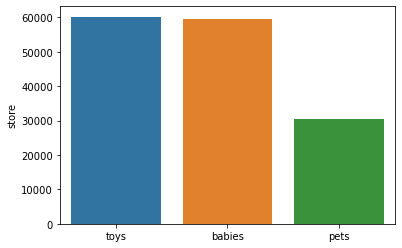

In [103]:
sns.barplot(fraud['store'].unique(),fraud['store'].value_counts())

<AxesSubplot:ylabel='browser'>

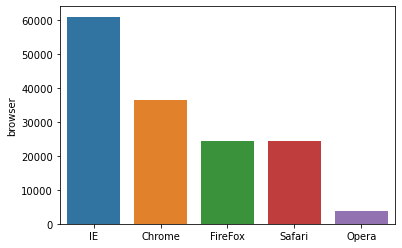

In [104]:
sns.barplot(fraud['browser'].unique(),fraud['browser'].value_counts())

In [105]:
fbrowser=pd.DataFrame(fraud.loc[fraud['fraud']==1])

<AxesSubplot:ylabel='browser'>

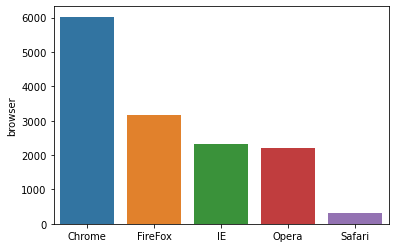

In [106]:
sns.barplot(fbrowser['browser'].unique(),fbrowser['browser'].value_counts())

Most of the frauds are done in chrome

<AxesSubplot:ylabel='sex'>

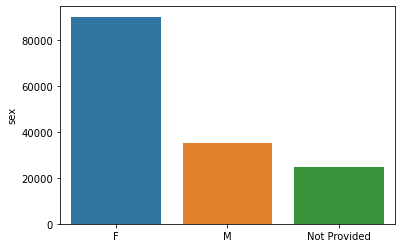

In [107]:
sns.barplot(fraud['sex'].unique(),fraud['sex'].value_counts())


Most women are involved in shopping items from stores like baby,pet and toys

<AxesSubplot:ylabel='sex'>

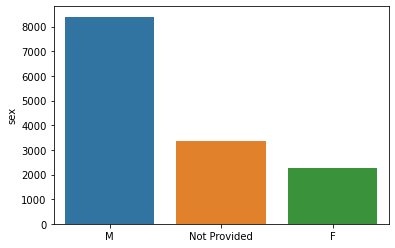

In [142]:
sns.barplot(fbrowser['sex'].unique(),fbrowser['sex'].value_counts())

Most fraud is done by male 

<AxesSubplot:ylabel='store'>

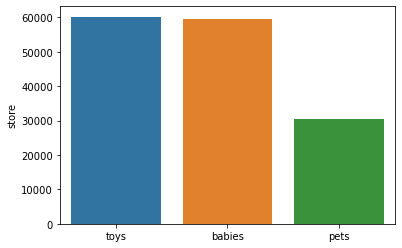

In [24]:
sns.barplot(fraud['store'].unique(),fraud['store'].value_counts())

<AxesSubplot:ylabel='store'>

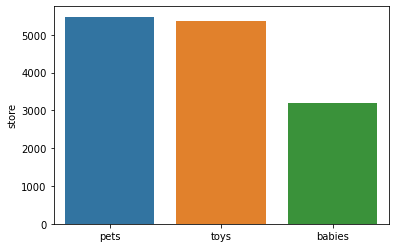

In [144]:
sns.barplot(fbrowser['store'].unique(),fbrowser['store'].value_counts())

In previous graph it is observed that most bought item are from store toys and babies. If we see in to what fraud tramsaction have bought is from store pet

In [25]:
fraud['country'].value_counts().head(10)

US    56563
ZZ    21286
CN    12046
JP     7326
GB     4534
KR     4089
DE     3734
CA     3655
FR     3127
BR     2964
Name: country, dtype: int64

In [26]:
fbrowser['country'].value_counts().head(10)

US    5390
ZZ    1822
CN    1044
JP     706
GB     474
CA     408
KR     376
FR     325
BR     279
DE     268
Name: country, dtype: int64

It is observed most of the purchase has been done UN,ZZ and CN . Most of the fraud is from UN,ZZ and CN. ZZ is unknown or unspecified country.24 userid don't have countries.

In [27]:
fraud['fraud'].value_counts(normalize=True)

0    0.90638
1    0.09362
Name: fraud, dtype: float64

<AxesSubplot:ylabel='age'>

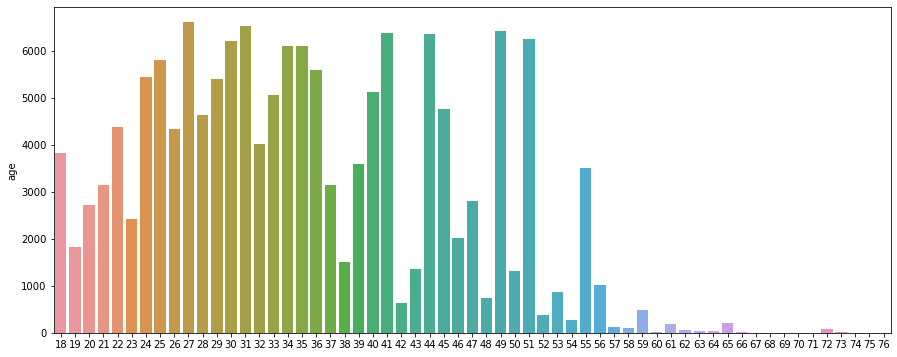

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(fraud['age'].unique(),fraud['age'].value_counts())

<AxesSubplot:ylabel='age'>

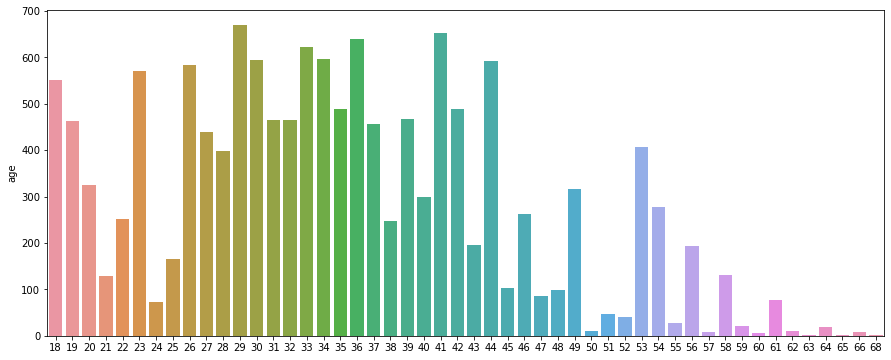

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(fbrowser['age'].unique(),fbrowser['age'].value_counts())

In [30]:
fp=fraud[['amount','fraud']].groupby('fraud').mean()
fp

,amount
fraud,
0,36.931285
1,37.014770


In [31]:
fraud['signup_datetime']=pd.to_datetime(fraud['signup_datetime'])
fraud['datetime']=pd.to_datetime(fraud['datetime'])

In [32]:
fraud['signup_datetime'].min(),fraud['signup_datetime'].max()

(Timestamp('2016-02-05 00:00:42'), Timestamp('2016-09-25 04:37:34'))

In [33]:
fraud['datetime'].min(),fraud['datetime'].max()

(Timestamp('2016-02-05 00:00:44'), Timestamp('2017-01-22 10:27:53'))

In [34]:
fraud.columns

Index(['Unnamed: 0', 'user_id', 'signup_datetime', 'datetime', 'amount',
       'device_id', 'store', 'browser', 'sex', 'age', 'ip_address', 'fraud',
       'country'],
      dtype='object')

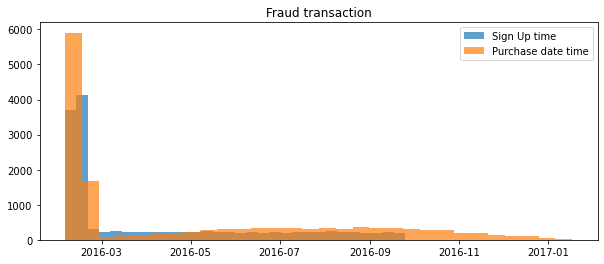

In [35]:
plt.figure(figsize=(10,4))
plt.hist(fraud['signup_datetime'][fraud['fraud']==1],bins=30,alpha=0.7,label="Sign Up time")
plt.hist(fraud['datetime'][fraud['fraud']==1],bins=30,alpha=0.7,label="Purchase date time")
plt.title('Fraud transaction')
plt.legend()

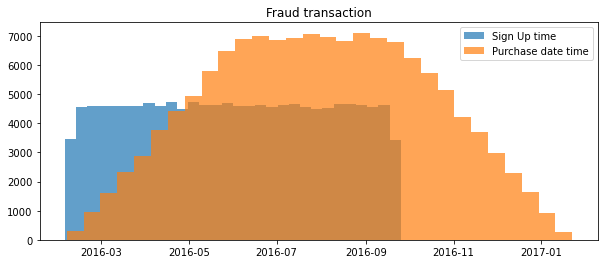

In [36]:
plt.figure(figsize=(10,4))
plt.hist(fraud['signup_datetime'][fraud['fraud']==0],bins=30,alpha=0.7,label="Sign Up time")
plt.hist(fraud['datetime'][fraud['fraud']==0],bins=30,alpha=0.7,label="Purchase date time")
plt.title('Fraud transaction')
plt.legend()

It is observed that sign up time and purchase time of non fraud user is more. Whereas for faud they have created just before the purchase time.

In [48]:
def fraud_no_fraud_chart(col):
    df1 = pd.DataFrame(fraud[fraud['fraud']==1].groupby(col).count())
    df0 = pd.DataFrame(fraud[fraud['fraud']==0].groupby(col).count())
    
    fig, ax = plt.subplots(1,2,figsize=(14,5),sharey=True)
    
    sns.barplot(df1.index.unique(),df1['fraud'],ax=ax[0])
    sns.barplot(df0.index.unique(),df0['fraud'],ax=ax[1])
    ax[0].set_title(col[0].upper() + col[1:] + " for Fraudulent Transactions",fontsize=14)
    ax[1].set_title(col[0].upper() + col[1:] + " for Legitimate Transactions",fontsize=14);

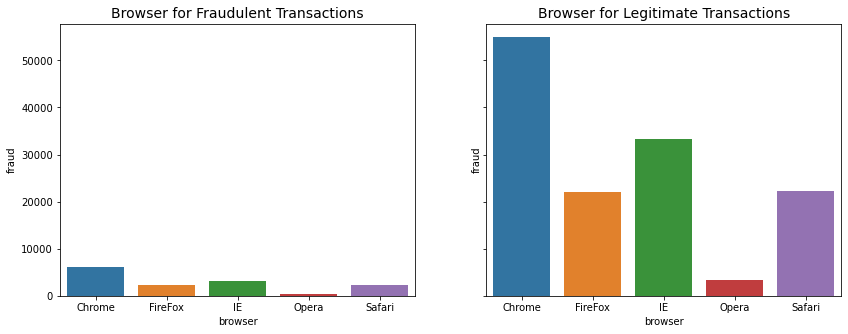

In [49]:
fraud_no_fraud_chart('browser')

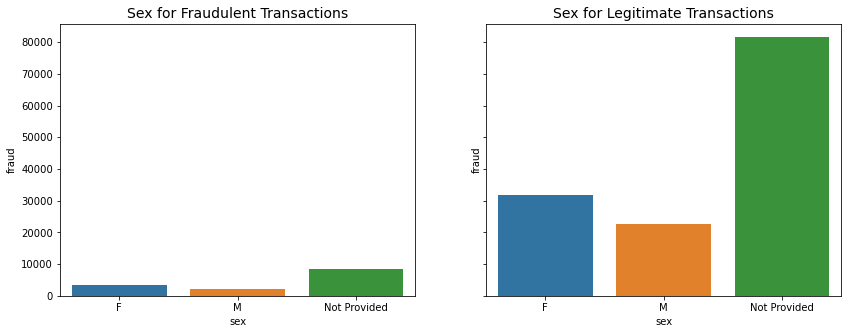

In [50]:
fraud_no_fraud_chart('sex')

Most of the fraud transaction have not provided gender detail.

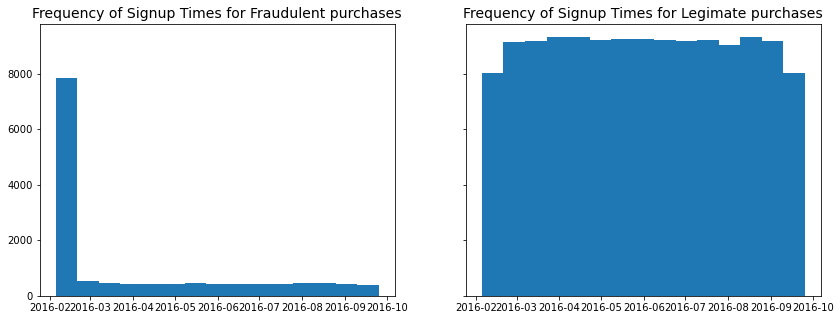

In [53]:
fig, ax = plt.subplots(1,2, figsize = (14,5),sharey=True)
ax[0].hist(fraud['signup_datetime'][fraud['fraud']==1],bins=15)
ax[0].set_title("Frequency of Signup Times for Fraudulent purchases",fontsize=14)
ax[1].hist(fraud['signup_datetime'][fraud['fraud']==0],bins=15)
ax[1].set_title("Frequency of Signup Times for Legimate purchases",fontsize=14);

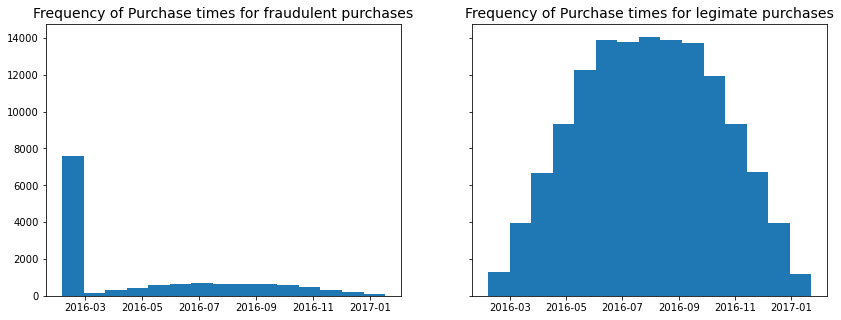

In [55]:
fig, ax = plt.subplots(1,2, figsize = (14,5),sharey=True)
ax[0].hist(fraud['datetime'][fraud['fraud']==1],bins=15)
ax[0].set_title("Frequency of Purchase times for fraudulent purchases",fontsize=14)
ax[1].hist(fraud['datetime'][fraud['fraud']==0],bins=15)
ax[1].set_title("Frequency of Purchase times for legimate purchases",fontsize=14);

In [56]:
fraud['country'].isnull().sum()

24

In [57]:
len(fraud['country'].sort_values().unique())

195

In [58]:
total_country=fraud[['country','fraud']].groupby('country').count().sort_values('fraud',ascending=True)

In [60]:
fraud_country=fraud[['country','fraud']][fraud['fraud']==1].groupby('country').count().sort_values('fraud',ascending=True)

In [72]:
ratedf=pd.DataFrame(total_country)

ratedf=ratedf.merge(fraud_country,on='country')
ratedf['ratio']=ratedf['fraud_y']/ratedf['fraud_x']
ratedf.rename(columns={'fraud_x':'Total_Transaction','fraud_y':'fraud_Transaction'},inplace=True)
ratedf.reset_index(inplace=True)

In [75]:
ratedf.loc[ratedf['ratio']>0.10]

,country,Total_Transaction,fraud_Transaction,ratio
0,TM,1,1,1.000000
1,YE,4,1,0.250000
2,IM,5,1,0.200000
3,ME,5,1,0.200000
4,CM,6,1,0.166667
5,CI,6,1,0.166667
6,MW,7,1,0.142857
7,GI,8,1,0.125000
8,HN,9,1,0.111111
9,SN,9,1,0.111111


Countries showing high ratio indicate the user has they have done only fraud trasaction

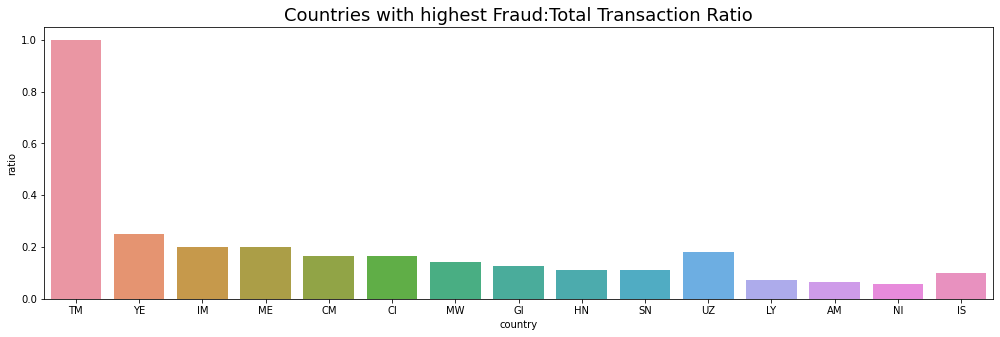

In [76]:
plt.figure(figsize=(17,5))
ax = sns.barplot(ratedf['country'].head(15),ratedf['ratio'].head(15))
ax.set_title("Countries with highest Fraud:Total Transaction Ratio",fontsize=18);

In [78]:
ratedf1=ratedf.sort_values('fraud_Transaction',ascending=False).head(20)
ratedf1

,country,Total_Transaction,fraud_Transaction,ratio
110,US,56563,5390,0.095292
109,ZZ,21286,1822,0.085596
108,CN,12046,1044,0.086668
107,JP,7326,706,0.096369
106,GB,4534,474,0.104543
103,CA,3655,408,0.111628
105,KR,4089,376,0.091954
102,FR,3127,325,0.103933
101,BR,2964,279,0.094130
104,DE,3734,268,0.071773


Text(0.5, 1.0, 'Top fraud transaction countries')

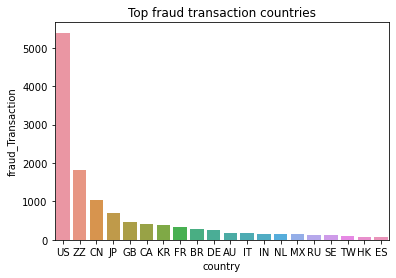

In [81]:
ax=sns.barplot(ratedf1['country'].head(20),ratedf1['fraud_Transaction'].head(20))
ax.set_title("Top fraud transaction countries")

## Data transformation

#### Ordinalize categorical Variable

In [3]:
fraud=pd.read_csv('fraud_w_country.csv',index_col=0)

In [4]:
fraud1=fraud.copy()


In [5]:
fraud1.head()

,user_id,signup_datetime,datetime,amount,device_id,store,browser,sex,age,ip_address,fraud,country
0,40630765,2016-03-22 09:11:01,2016-06-01 01:58:07,12.05,41974320,toys,IE,F,27,3924506326,0,ZZ
1,90517585,2016-05-17 14:45:10,2016-06-03 13:49:55,55.68,70879186,babies,IE,F,31,2432689644,0,CN
2,63383012,2016-09-02 14:15:02,2016-12-03 13:38:24,33.45,40697637,pets,Chrome,F,49,2093944038,0,CN
3,34695055,2016-08-03 01:51:47,2016-11-11 12:49:45,40.32,29544115,toys,FireFox,M,41,77751156,0,US
4,92152176,2016-07-17 04:58:30,2016-08-24 19:12:41,49.16,80967980,babies,Chrome,Not Provided,44,1520970714,0,ES


In [6]:
fraud1['sex'].unique()

array(['F', 'M', 'Not Provided'], dtype=object)

In [6]:
store_dict={'toys':0, 'babies':1, 'pets':2}
browser_dict={'IE':0, 'Chrome':1, 'FireFox':2, 'Safari':3, 'Opera':4}
sex_dict={'F':0, 'M':1, 'Not Provided':2}





In [7]:
fraud1.store=fraud1.store.replace(store_dict)
fraud1.browser=fraud1.browser.replace(browser_dict)
fraud1.sex=fraud1.sex.replace(sex_dict)

In [8]:
fraud1.head()

,user_id,signup_datetime,datetime,amount,device_id,store,browser,sex,age,ip_address,fraud,country
0,40630765,2016-03-22 09:11:01,2016-06-01 01:58:07,12.05,41974320,0,0,0,27,3924506326,0,ZZ
1,90517585,2016-05-17 14:45:10,2016-06-03 13:49:55,55.68,70879186,1,0,0,31,2432689644,0,CN
2,63383012,2016-09-02 14:15:02,2016-12-03 13:38:24,33.45,40697637,2,1,0,49,2093944038,0,CN
3,34695055,2016-08-03 01:51:47,2016-11-11 12:49:45,40.32,29544115,0,2,1,41,77751156,0,US
4,92152176,2016-07-17 04:58:30,2016-08-24 19:12:41,49.16,80967980,1,1,2,44,1520970714,0,ES


In [9]:
labels=fraud1['country'].astype('category').cat.categories.tolist()
replace_map={'country':{k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [10]:
fraud1.replace(replace_map,inplace=True)
fraud1['country'].fillna(0,inplace=True)

## Under sampling

In [12]:
len(fraud1[fraud1['fraud']==1])

14043

In [12]:
fraud_df=fraud1.loc[fraud1['fraud']==1]


In [13]:
nonfraud_df=fraud1.loc[fraud1['fraud']==0].sample(n=14043,random_state=42)


In [14]:
fraud2=pd.concat([fraud_df,nonfraud_df])

In [15]:
fraud2['fraud'].value_counts()

1    14043
0    14043
Name: fraud, dtype: int64

## Modelling

In [16]:
fraud2._get_numeric_data().head()

,user_id,amount,device_id,store,browser,sex,age,ip_address,fraud,country
16,8208463,28.01,19220930,2,1,1,29,2642967635,1,60.0
30,40941356,36.03,3208052,0,2,2,41,3426212580,1,180.0
45,39697648,9.19,12276401,1,0,0,36,3315175577,1,112.0
62,83725265,22.54,75109980,0,1,0,29,470897421,1,180.0
70,23442510,22.61,98021591,2,2,0,33,828416954,1,92.0


In [18]:
fraud2.columns

Index(['user_id', 'signup_datetime', 'datetime', 'amount', 'device_id',
       'store', 'browser', 'sex', 'age', 'ip_address', 'fraud', 'country'],
      dtype='object')

In [19]:
fraud2.reset_index(inplace=False)

,index,user_id,signup_datetime,datetime,amount,device_id,store,browser,sex,age,ip_address,fraud,country
0,16,8208463,2016-02-10 03:47:47,2016-02-10 03:47:48,28.01,19220930,2,1,1,29,2642967635,1,60.0
1,30,40941356,2016-09-07 21:55:12,2016-12-23 23:41:46,36.03,3208052,0,2,2,41,3426212580,1,180.0
2,45,39697648,2016-08-03 06:19:18,2016-11-10 22:31:46,9.19,12276401,1,0,0,36,3315175577,1,112.0
3,62,83725265,2016-02-19 13:34:03,2016-02-19 13:34:04,22.54,75109980,0,1,0,29,470897421,1,180.0
4,70,23442510,2016-02-14 00:24:50,2016-02-14 00:24:51,22.61,98021591,2,2,0,33,828416954,1,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28081,116703,54725560,2016-06-06 18:08:02,2016-10-03 06:18:13,30.54,46379730,0,0,0,39,461418968,0,37.0
28082,117268,2480929,2016-04-24 00:25:06,2016-08-08 17:57:43,37.33,56439324,2,1,2,34,3005731004,0,7.0
28083,106573,62747697,2016-03-15 23:21:35,2016-03-26 10:16:37,12.80,28701480,0,3,2,28,1827122023,0,180.0
28084,101585,29686556,2016-08-27 03:18:00,2016-10-31 15:07:55,31.26,36332159,0,1,0,38,3752736099,0,98.0


In [27]:
features=['user_id','amount', 'device_id','store', 'browser', 'sex', 'age', 'country']

In [21]:
X=fraud2[features]
y=fraud2['fraud']

In [31]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,make_scorer,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
 

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [269]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,stratify=y)

In [274]:
X_train.value_counts()
#X_test.value_counts()

user_id   amount  device_id  store  browser  sex  age  country
99997555  44.20   81234050   1      3        2    34   37.0       1
33319958  52.82   6908923    0      1        2    23   180.0      1
33242543  38.25   9158721    1      1        2    41   180.0      1
33242725  43.24   67925095   0      1        2    27   180.0      1
33243664  45.52   59451888   2      1        2    35   98.0       1
                                                                 ..
66135776  52.04   66398937   1      1        2    43   180.0      1
66136083  40.18   93360126   0      1        2    39   180.0      1
66142683  40.31   9976882    0      1        2    25   45.0       1
66143378  42.02   97887196   0      3        1    21   7.0        1
9726      15.09   18177065   0      0        2    40   194.0      1
Length: 18817, dtype: int64

In [38]:
def model_performance(y_test, model):    
    rf_cm_te = confusion_matrix(y_test,model)
    print(rf_cm_te)
    print("Precision:",precision_score(y_test,model))
    print("Recall",recall_score(y_test,model))
    print("Fl-Score",f1_score(y_test,model))
    
    print('---------------------Test---------------------')
    print(classification_report(y_test,model))
    
    #Confusion Matrix
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(rf_cm_te), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Test Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    
    
     

In [43]:
#set no of trees
nestimators=[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
#Max features at every split
max_ft=['auto','sqrt','log2']
#max no of levels in each tree
max_dep=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
#min no of sample to split a node
min_samples_split=[2,5,10,15,100]

#min no of sample to consider at each node
min_sample_leaf=[1,2,5,10]

In [49]:
tree_param={
    #'max_features':max_ft,
    'max_depth':max_dep,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_sample_leaf
}

## Logistic Regression

In [281]:
logreg2 = LogisticRegression(solver = 'lbfgs')

# fit the model with data
logreg2.fit(X_train,y_train.values.ravel())

#
y_pred=logreg2.predict(X_test)


<AxesSubplot:xlabel='fraud'>

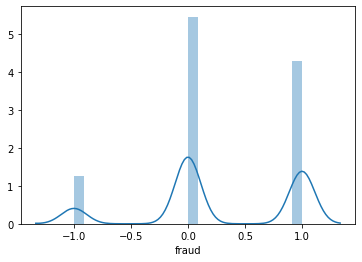

In [282]:
sns.distplot(y_test-y_pred)

[[1400 3235]
 [1382 3252]]
Precision: 0.5013103129335594
Recall 0.7017695295640914
Fl-Score 0.5848394928513623
---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.50      0.30      0.38      4635
           1       0.50      0.70      0.58      4634

    accuracy                           0.50      9269
   macro avg       0.50      0.50      0.48      9269
weighted avg       0.50      0.50      0.48      9269



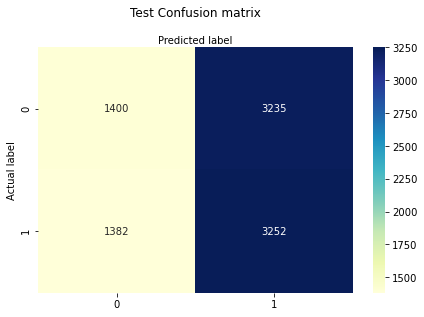

In [283]:
model_performance(y_test,tree_p)

### Decision Tree

In [257]:
tree=DecisionTreeClassifier()


In [258]:
tree_rand=RandomizedSearchCV(estimator=tree,param_distributions=tree_param,n_jobs=1,n_iter=10,cv=5,verbose=2,random_state=0)

In [259]:
tree_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=20, total=   0.1s
[CV] min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=20 
[CV]  min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=20, total=   0.1s
[CV] min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=20 
[CV]  min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=20, total=   0.1s
[CV] min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=20 
[CV]  min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=20, total=   0.1s
[CV] min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=20 
[CV]  min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=20, total=   0.1s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=10 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=10, total=   0.1s
[CV] min_samples_split=5, min_sa

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [260]:
tree_p=tree_rand.predict(X_test)

<AxesSubplot:xlabel='fraud'>

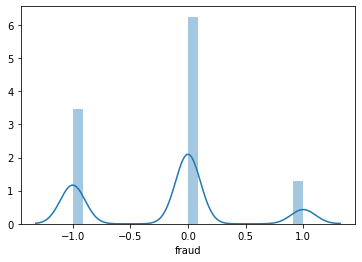

In [261]:
sns.distplot(y_test-tree_p)

[[1706 2929]
 [1076 3558]]
---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.61      0.37      0.46      4635
           1       0.55      0.77      0.64      4634

    accuracy                           0.57      9269
   macro avg       0.58      0.57      0.55      9269
weighted avg       0.58      0.57      0.55      9269



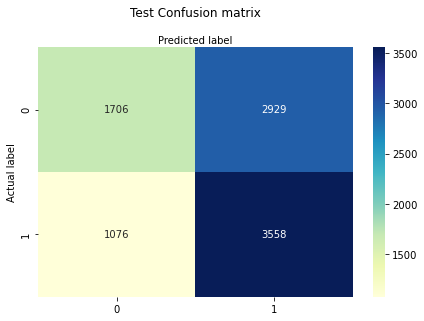

In [264]:
model_performance(y_test,tree_p)

## Random Forest

In [285]:
rf = RandomForestClassifier(n_estimators=10) 
rf.fit(X_train,y_train)
rf_preds= rf.predict(X_test)
print("RF with default estimators and max_depth")
print("Precision:",precision_score(y_test,rf_preds))
print("Recall",recall_score(y_test,rf_preds))
print("Fl-Score",f1_score(y_test,rf_preds));
print("Confusion Matrix",confusion_matrix(y_test,rf_preds))

RF with default estimators and max_depth
Precision: 0.6781029263370333
Recall 0.5800604229607251
Fl-Score 0.625261688764829
Confusion Matrix [[3359 1276]
 [1946 2688]]


In [287]:
for i in [50,100,150]:
    for j in [20,30]:
        for k in [2,5]:
            rf = RandomForestClassifier(n_estimators=i,max_depth=j,min_samples_split=k)
            rf.fit(X_train,y_train)
            rf_preds= rf.predict(X_test)

            print("RF with "+str(i) +" estimators", " and max_depth of "+ str(j)+" and min_sample_split "+str(k))
            print("Precision:",precision_score(y_test,rf_preds))
            print("Recall",recall_score(y_test,rf_preds))
            print("Fl-Score",f1_score(y_test,rf_preds))


RF with 50 estimators  and max_depth of 20 and min_sample_split 2
Precision: 0.6739670354481825
Recall 0.6441519205869659
Fl-Score 0.6587222773915922
RF with 50 estimators  and max_depth of 20 and min_sample_split 5
Precision: 0.6760854583046175
Recall 0.6350884764782045
Fl-Score 0.6549460331590076
RF with 50 estimators  and max_depth of 30 and min_sample_split 2
Precision: 0.6737540009144948
Recall 0.6359516616314199
Fl-Score 0.6543072824156306
RF with 50 estimators  and max_depth of 30 and min_sample_split 5
Precision: 0.678793460741423
Recall 0.6361674579197237
Fl-Score 0.6567895733541271
RF with 100 estimators  and max_depth of 20 and min_sample_split 2
Precision: 0.6875868457619269
Recall 0.6406991799741044
Fl-Score 0.6633154602323502
RF with 100 estimators  and max_depth of 20 and min_sample_split 5
Precision: 0.6877037727061015
Recall 0.637246439361243
Fl-Score 0.6615143369175628
RF with 100 estimators  and max_depth of 30 and min_sample_split 2
Precision: 0.6977347805568664
Rec

In [289]:
param={
    'n_estimators':nestimators,
    'max_features':max_ft,
    'max_depth':max_dep,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_sample_leaf
}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   9.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   9.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   9.8s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=  10.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   9.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  29.9s
[CV] n_estimators=800, min_samples_split=2, m

[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=  11.0s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=  11.2s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=  11.8s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=  11.2s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=  11.2s
[CV] n_estimators=800, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.0min finished


[[3488 1147]
 [1748 2886]]
Precision: 0.7155963302752294
Recall 0.6227880880448856
Fl-Score 0.6659743856005539
---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      4635
           1       0.72      0.62      0.67      4634

    accuracy                           0.69      9269
   macro avg       0.69      0.69      0.69      9269
weighted avg       0.69      0.69      0.69      9269



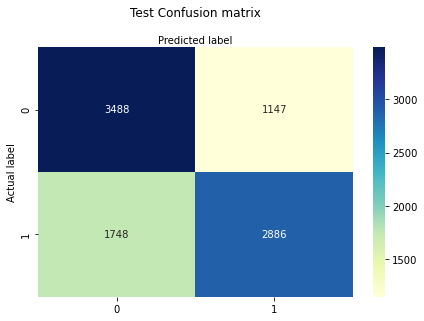

In [297]:
rf=RandomForestClassifier()
rf_R=RandomizedSearchCV(estimator=rf,param_distributions=param,n_jobs=1,n_iter=10,cv=5,verbose=2,random_state=0)
rf_R.fit(X_train,y_train)
rf_P=rf_R.predict(X_test)
model_performance(y_test,rf_P)

[[3488 1147]
 [1748 2886]]
Precision: 0.7155963302752294
Recall 0.6227880880448856
Fl-Score 0.6659743856005539
---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      4635
           1       0.72      0.62      0.67      4634

    accuracy                           0.69      9269
   macro avg       0.69      0.69      0.69      9269
weighted avg       0.69      0.69      0.69      9269



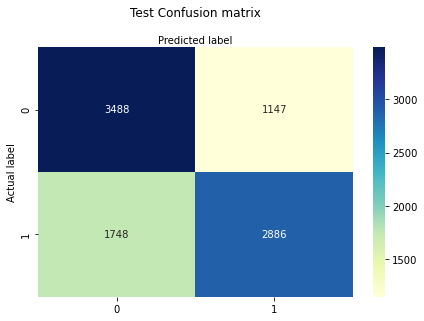

In [298]:
model_performance(y_test,rf_P)

In [52]:
fraud.columns

Index(['Unnamed: 0', 'user_id', 'signup_datetime', 'datetime', 'amount',
       'device_id', 'store', 'browser', 'sex', 'age', 'ip_address', 'fraud',
       'country'],
      dtype='object')

## SMOTE

In [28]:
fraud3=fraud1.copy()

In [40]:
len(fraud1)

150000

In [29]:
X=fraud3[features]
y=fraud3['fraud']

In [33]:
from imblearn.over_sampling import SMOTE

method = SMOTE(random_state = 2) 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)


In [41]:
len(X_resampled)

217598

### Logistic regression

In [35]:
logreg2 = LogisticRegression(solver = 'lbfgs')

# fit the model with data
logreg2.fit(X_resampled,y_resampled.values.ravel())

#
y_pred=logreg2.predict(X_test)


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.20      0.33     27158
           1       0.10      0.80      0.17      2842

    accuracy                           0.26     30000
   macro avg       0.50      0.50      0.25     30000
weighted avg       0.83      0.26      0.32     30000



[[ 5539 21619]
 [  560  2282]]
Precision: 0.0954771766871679
Recall 0.8029556650246306
Fl-Score 0.17066148150917995
---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.91      0.20      0.33     27158
           1       0.10      0.80      0.17      2842

    accuracy                           0.26     30000
   macro avg       0.50      0.50      0.25     30000
weighted avg       0.83      0.26      0.32     30000



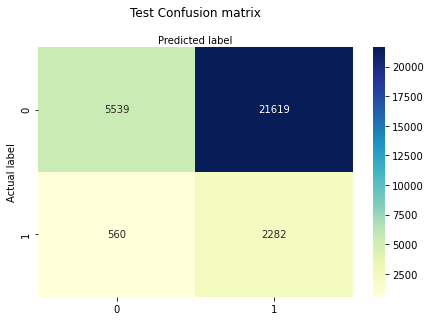

In [39]:
model_performance(y_test,y_pred)

## Decision Tree

In [50]:
tree=DecisionTreeClassifier()
tree_rand=RandomizedSearchCV(estimator=tree,param_distributions=tree_param,n_jobs=1,n_iter=10,cv=5,verbose=2,random_state=0)
tree_rand.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=15, min_samples_leaf=2, max_depth=15 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=15, min_samples_leaf=2, max_depth=15, total=   2.6s
[CV] min_samples_split=15, min_samples_leaf=2, max_depth=15 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  min_samples_split=15, min_samples_leaf=2, max_depth=15, total=   2.6s
[CV] min_samples_split=15, min_samples_leaf=2, max_depth=15 ..........
[CV]  min_samples_split=15, min_samples_leaf=2, max_depth=15, total=   2.8s
[CV] min_samples_split=15, min_samples_leaf=2, max_depth=15 ..........
[CV]  min_samples_split=15, min_samples_leaf=2, max_depth=15, total=   3.0s
[CV] min_samples_split=15, min_samples_leaf=2, max_depth=15 ..........
[CV]  min_samples_split=15, min_samples_leaf=2, max_depth=15, total=   2.7s
[CV] min_samples_split=100, min_samples_leaf=5, max_depth=25 .........
[CV]  min_samples_split=100, min_samples_leaf=5, max_depth=25, total=   2.8s
[CV] min_samples_split=100, min_samples_leaf=5, max_depth=25 .........
[CV]  min_samples_split=100, min_samples_leaf=5, max_depth=25, total=   2.9s
[CV] min_samples_split=100, min_samples_leaf=5, max_depth=25 .........
[CV]  min_samples_split=100, min_samples_leaf=5, max_depth=25, total=   3.0s
[CV] min_samples_split=100, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=0, verbose=2)

In [51]:
tree_p=tree_rand.predict(X_test)

[[24544  2614]
 [ 1954   888]]
Precision: 0.2535693889206168
Recall 0.3124560168895144
Fl-Score 0.27994955863808324
---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     27158
           1       0.25      0.31      0.28      2842

    accuracy                           0.85     30000
   macro avg       0.59      0.61      0.60     30000
weighted avg       0.86      0.85      0.85     30000



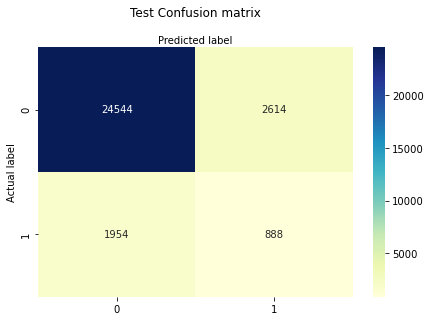

In [52]:
model_performance(y_test,tree_p)

## Random Forest

In [59]:
param={
    'n_estimators':nestimators,
    'max_features':max_ft,
    'max_depth':max_dep,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_sample_leaf
}

In [60]:
rf=RandomForestClassifier()
rf_R=RandomizedSearchCV(estimator=rf,param_distributions=param,n_jobs=1,n_iter=10,cv=5,verbose=2,random_state=0)
rf_R.fit(X_resampled,y_resampled)
rf_P=rf_R.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total= 3.4min
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total= 3.4min
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total= 3.4min
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total= 3.4min
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total= 3.5min
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total= 9.7min
[CV] n_estimators=800, min_samples_split=2, m

[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total= 3.0min
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total= 2.9min
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total= 2.9min
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total= 2.9min
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total= 2.9min
[CV] n_estimators=800, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 201.1min finished


[[24693  2465]
 [ 1876   966]]
Precision: 0.2815505683474206
Recall 0.3399014778325123
Fl-Score 0.3079866092778575
---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     27158
           1       0.28      0.34      0.31      2842

    accuracy                           0.86     30000
   macro avg       0.61      0.62      0.61     30000
weighted avg       0.87      0.86      0.86     30000



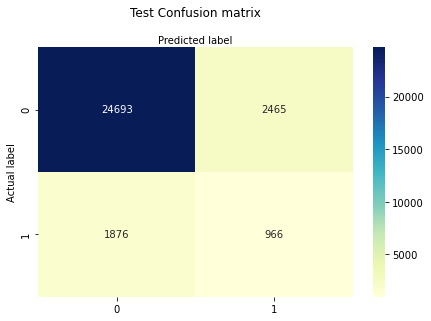

In [61]:
model_performance(y_test,rf_P)

In [ ]:
X=fraud2[features]
y=fraud2['fraud']

In [19]:
len(fraud1)

150000